# **Lab 2 : Israel Elections Data Analysis**
### **ID1:206094278,ID2:205926660** 


On this lab we have been requested to show correlation between parties and the effect of 100% voting rate by calculating the additional votes that been added to a party by city and by ballot. 

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df_2020_raw = pd.read_csv("votes per city 2020.csv", encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1)
df_2020 = df_2020[df_2020.columns[5:-1]]
df_2020_no_duble = df_2020.drop('מעטפות חיצוניות')

In [3]:
dict_party = {'מחל':'הליכוד','פה':'כחול לבן','ודעם':'הרשימה המשותפת','שס':'שס','ג':'יהדות התורה','אמת':'העבודה גשר מרצ','ל':'ישראל ביתנו','טב':'ימינה'}

##### **Question 1**


In [4]:
def two_parties_scatter(df, party1, party2,col):
    votes_per_city = df.sum(axis=1)
    party_share1 = df[party1] / votes_per_city
    party_share2 = df[party2] / votes_per_city
    area = np.pi*np.square((votes_per_city.div(max(votes_per_city)))*7.979)
    area[area<=0.5]=0.5
    plt.scatter(party_share1, party_share2,s=area,c=col) 
    plt.xlabel(dict_party[party1][::-1])
    plt.ylabel(dict_party[party2][::-1])
    plt.title('scatter plot of '+dict_party[party1][::-1]+' vs ' + dict_party[party2][::-1])
    plt.show()


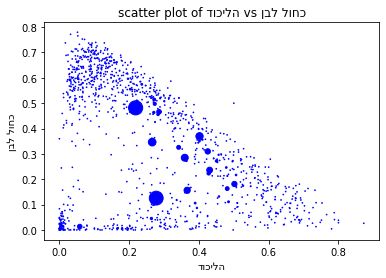

In [5]:
votes_per_city = df_2020_no_duble.sum(axis=1)
ss=np.pi*np.square((votes_per_city.div(max(votes_per_city)))*7.979)
two_parties_scatter(df_2020_no_duble,'מחל','פה','blue')


##### blue & white vs the licud :
in this plot it is possibole to see an example of a negitive correltion between the two parties voters.
which means that the each party is considered to be the "opposite" from the other but compete on the same voters

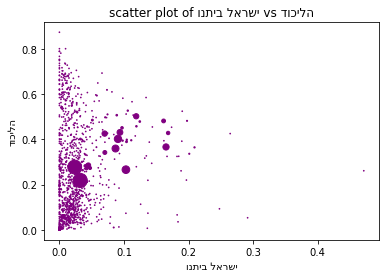

In [6]:
two_parties_scatter(df_2020_no_duble,'ל','מחל','purple')


##### israel beitno vs licud :
in this plot it is possibole to see an example of a possitive correltion between the two parties voters.
which means that the each party is considered to be the in the same political side compete on the same voters

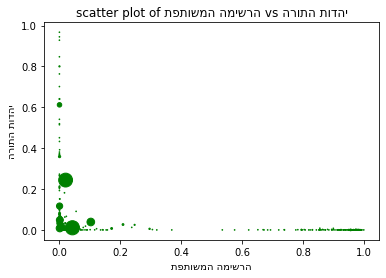

In [7]:
two_parties_scatter(df_2020_no_duble,'ודעם','ג','green')

##### Yehadoot Hatora vs the joint list party :
On this plot it seems that there are a very few cities that have pepole that voted to both parties.
which means that the each party is considered to be the opposite political but compete on diffrent voters.

##### **Question 2**:

In [8]:
a = df_2020.sum().div(df_2020.sum().sum()).sort_values(ascending=False) 
a = pd.DataFrame(a[a>0.0325]) # finding the eight largest parties
top_par1=list(a.index[:]) # creating a list of the eight parties
per_votes = round(df_2020.div(df_2020_raw['כשרים'],axis=0),3)
top_par_corr1=per_votes[top_par1].corr() 
a["Political score"] =[2,6,8,3,4,7,5,1] # creating a political score to sort the parties by political views
a=a.sort_values("Political score")
top_par2 = list(a.index[:]) # creating a list of the eight parties sorted by political views
top_par_corr2 = per_votes[top_par2].corr()


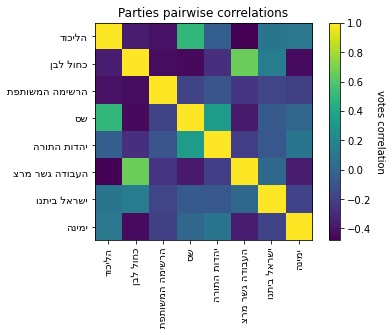

In [9]:
def heatmap_corr(corr_mat,names):
    rev_names = [dict_party[i][::-1] for i in list(names)]
    fig, ax = plt.subplots()
    im = ax.imshow(corr_mat, cmap=plt.get_cmap('viridis'))
    n = corr_mat.shape[0]  # get number of variables 
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(rev_names,rotation=90)
    ax.set_yticklabels(rev_names)
    ax.set_title("Parties pairwise correlations")
    
    cbar = ax.figure.colorbar(im, ax=ax) 
    cbar.ax.set_ylabel('votes correlation', rotation=-90, va="bottom")
    
    
heatmap_corr(top_par_corr1,top_par1)


 the frist figre is a correlation plot which show correlation of each of the top eight parties with each other.  

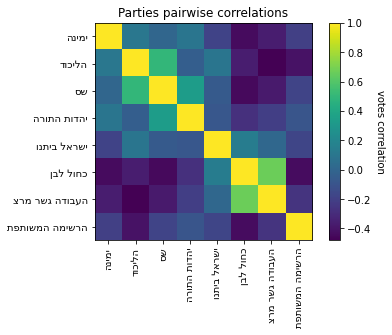

In [10]:
heatmap_corr(top_par_corr2,top_par2)

 The second figre is a correlation plot which show correlation of each of the top eight parties with each other but now <br>
 the parties appearance is orded by thier political view. <br>
 This order of appearance gives the observer the relation between the parties correlations and thier political views

##### **Question 3**:

In [11]:
df_2020_new=df_2020_raw.drop(['סמל ועדה','סמל ישוב','מצביעים','Unnamed: 37'],axis=1)

In [12]:
def nipoach(df,d):
    width = 0.3 
    names = d.keys()
    all_voters =  df.iloc[:,0:1]
    kosher = df.iloc[:,2:3]
    rev_names = [d[name][::-1] for name in list(names)]
    n=len(rev_names)
    city_votes = df[df.columns[3:df.shape[1]]].sum().div( df[df.columns[3:df.shape[1]]].sum().sum()) #computimg the original voting
    city_votes = city_votes[names] # show only the top eight parties
    print(city_votes)
    city_votes_100=[0]*len(df.iloc[0][3:])
    # for each settelment the for loop compute
    # the ratio between all voters and the "kosher" votes multiplay it by the settelment votes distribution
    for i in range(0,len(df.index)): 
        j = (df.iloc[i][3:]*int(all_voters.iloc[i]))/int(kosher.iloc[i]) 
        city_votes_100=city_votes_100+j
        
    city_votes_100=city_votes_100.div(city_votes_100.sum())
    city_votes_100=city_votes_100[names] # show only the top eight parties
    print(city_votes_100)
    fig, ax = plt.subplots()
    
    city_bar = ax.bar(np.arange(n), list(city_votes_100), width, color='b')
    city_bar_100 = ax.bar(np.arange(n)+width, list(city_votes), width, color='r')
    
    ax.set_ylabel('Votes percent')
    y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
    ax.set_yticklabels(y_value) 
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2020')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names,rotation=90)
    ax.legend((city_bar_100[0], city_bar[0]), ("original",'100% voters'))
    plt.show()

    return fig, ax 

    
   
    
    
    

מחל     0.294647
פה      0.265875
ודעם    0.126688
שס      0.076873
ג       0.059789
אמת     0.058274
ל       0.057377
טב      0.052437
dtype: float64
מחל     0.295030
פה      0.261965
ודעם    0.134395
שס      0.076320
ג       0.058399
אמת     0.056880
ל       0.061406
טב      0.047817
dtype: float64


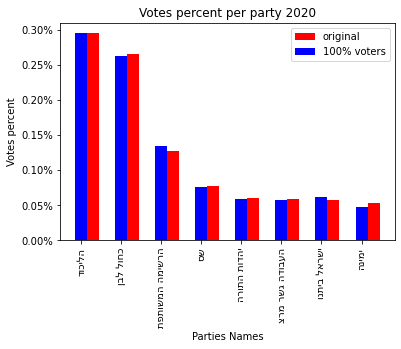

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25db4e416a0>)

In [13]:
nipoach(df_2020_new,dict_party)



In [14]:
df_2020_ball =pd.read_csv("votes per ballot 2020.csv", encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020_ball = df_2020_ball.iloc[:,6:]
df_2020_ball = df_2020_ball.drop('מצביעים',axis=1)

מחל     0.294647
פה      0.265875
ודעם    0.126688
שס      0.076873
ג       0.059789
אמת     0.058274
ל       0.057377
טב      0.052437
dtype: float64
מחל     0.295892
פה      0.258690
ודעם    0.136450
שס      0.075811
ג       0.056927
אמת     0.057008
ל       0.064324
טב      0.046941
dtype: float64


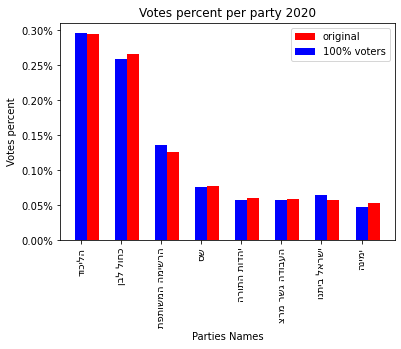

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25db3d35700>)

In [15]:
nipoach(df_2020_ball,dict_party)

Yes, the results have changed indeed.

Exlpanation: <br>
When we inflate the pattern of a certain city, the result would imitate this specific pattern. The same goes for each ballot.
The catch is that when we inflate a ballot, our sample is much smaller, meaning the pattern is far more detailed.

For example, if in a certain city the mandat map upperhands the Right wing, the inflation would expand the same pattern,
but if we look from a ballot perspective, we could face a situation such as low rates of votes to another wing (lets say 100 voted, all of them to the left, and the ballot holds 10,000 potential voters, then after inflation, the left get 9,900 more votes), would suddenly take a bigger impact in the total mandate map.

Of course the same goes for cities aswell, but normally big cities tend to have more hetrogenic population, therefore less change.

In [17]:
df_2020_ball

,בזב,פסולים,כשרים,אמת,ג,ודעם,ז,זך,זץ,טב,...,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,585,2,124,2,0,112,0,0,0,0,...,0,0,6,1,0,0,0,0,0,2
אבו גווייעד שבט,764,2,247,6,0,235,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
אבו גווייעד שבט,669,2,218,5,0,207,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
אבו גוש,530,7,292,15,1,229,0,0,0,0,...,0,0,11,0,0,0,0,0,0,2
אבו גוש,693,6,382,6,0,330,0,0,0,0,...,0,0,18,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
תקוע,672,1,495,10,14,2,3,0,0,174,...,9,0,27,0,0,0,0,1,0,11
תקוע,725,1,571,7,8,0,1,0,0,301,...,9,0,25,1,0,1,0,1,4,13
תראבין אצאנע שבט,520,0,48,0,0,43,0,1,0,0,...,0,0,4,0,0,0,0,0,0,0
